<a href="https://colab.research.google.com/github/skytecat/FraudDetection/blob/main/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЧТО СДЕЛАТЬ/ПРОВЕРИТЬ:

- графики распределения данных?
- сохранить модель с предобработкой
- выбрать способ масштабирования для data['Amount']
- написать вывод
- сохранить модель
- написать инструкцию по запуску

без масштабирования

первичная оценка:
f1: 0.7216978587773782
recall: 0.6188070175438597
precision: 0.8709508735241508

итоговая:
F1 Score for test with Optimal Threshold: 0.7955801104972375
Precision Score for test with Optimal Threshold: 0.8372093023255814
Recall Score for test with Optimal Threshold: 0.7578947368421053

с масштабированием всех V Standart Scaler

первичная оценка:
score for train data:
f1: 0.7191044190790256
recall: 0.6214385964912281
precision: 0.8595816954437645

итоговая:
F1 Score for test with Optimal Threshold: 0.7912087912087912
Precision Score for test with Optimal Threshold: 0.8275862068965517
Recall Score for test with Optimal Threshold: 0.7578947368421053

Robust для всего

первичная оценка:
score for train data:
f1: 0.7177291519632092
recall: 0.6081052631578947
precision: 0.8828562011257871

итоговая:
F1 Score for test with Optimal Threshold: 0.7912087912087912
Precision Score for test with Optimal Threshold: 0.8275862068965517
Recall Score for test with Optimal Threshold: 0.7578947368421053

## Загрузка и анализ данных

### Импорт библиотек

In [2]:
# Базовые библиотеки для работы с данными
import pandas as pd
import numpy as np

# Визуализация данных
import seaborn as sns
import matplotlib.pyplot as plt

# Предобработка данных
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

# Модели машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Оценка модели и подбор гиперпараметров
from sklearn.model_selection import (
     cross_val_score,
     GridSearchCV,
     cross_val_predict,
     StratifiedKFold
)
from sklearn.metrics import (
    precision_recall_curve,
    auc,
    make_scorer,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)

# Методы балансировки данных
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

### Загрузка данных

In [4]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Размер данных

In [ ]:
data.shape

(284807, 31)

### Типы признаков

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Пропущенные значения

In [ ]:
# Подсчет пропусков в каждом столбце
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### Анализ распределений числовых признаков

In [ ]:
data.describe()

NameError: name 'data' is not defined

In [ ]:
data[['Time', 'Amount']].describe()

,Time,Amount
count,283726.000000,283726.000000
mean,94811.077600,88.472687
std,47481.047891,250.399437
min,0.000000,0.000000
25%,54204.750000,5.600000
50%,84692.500000,22.000000
75%,139298.000000,77.510000
max,172792.000000,25691.160000


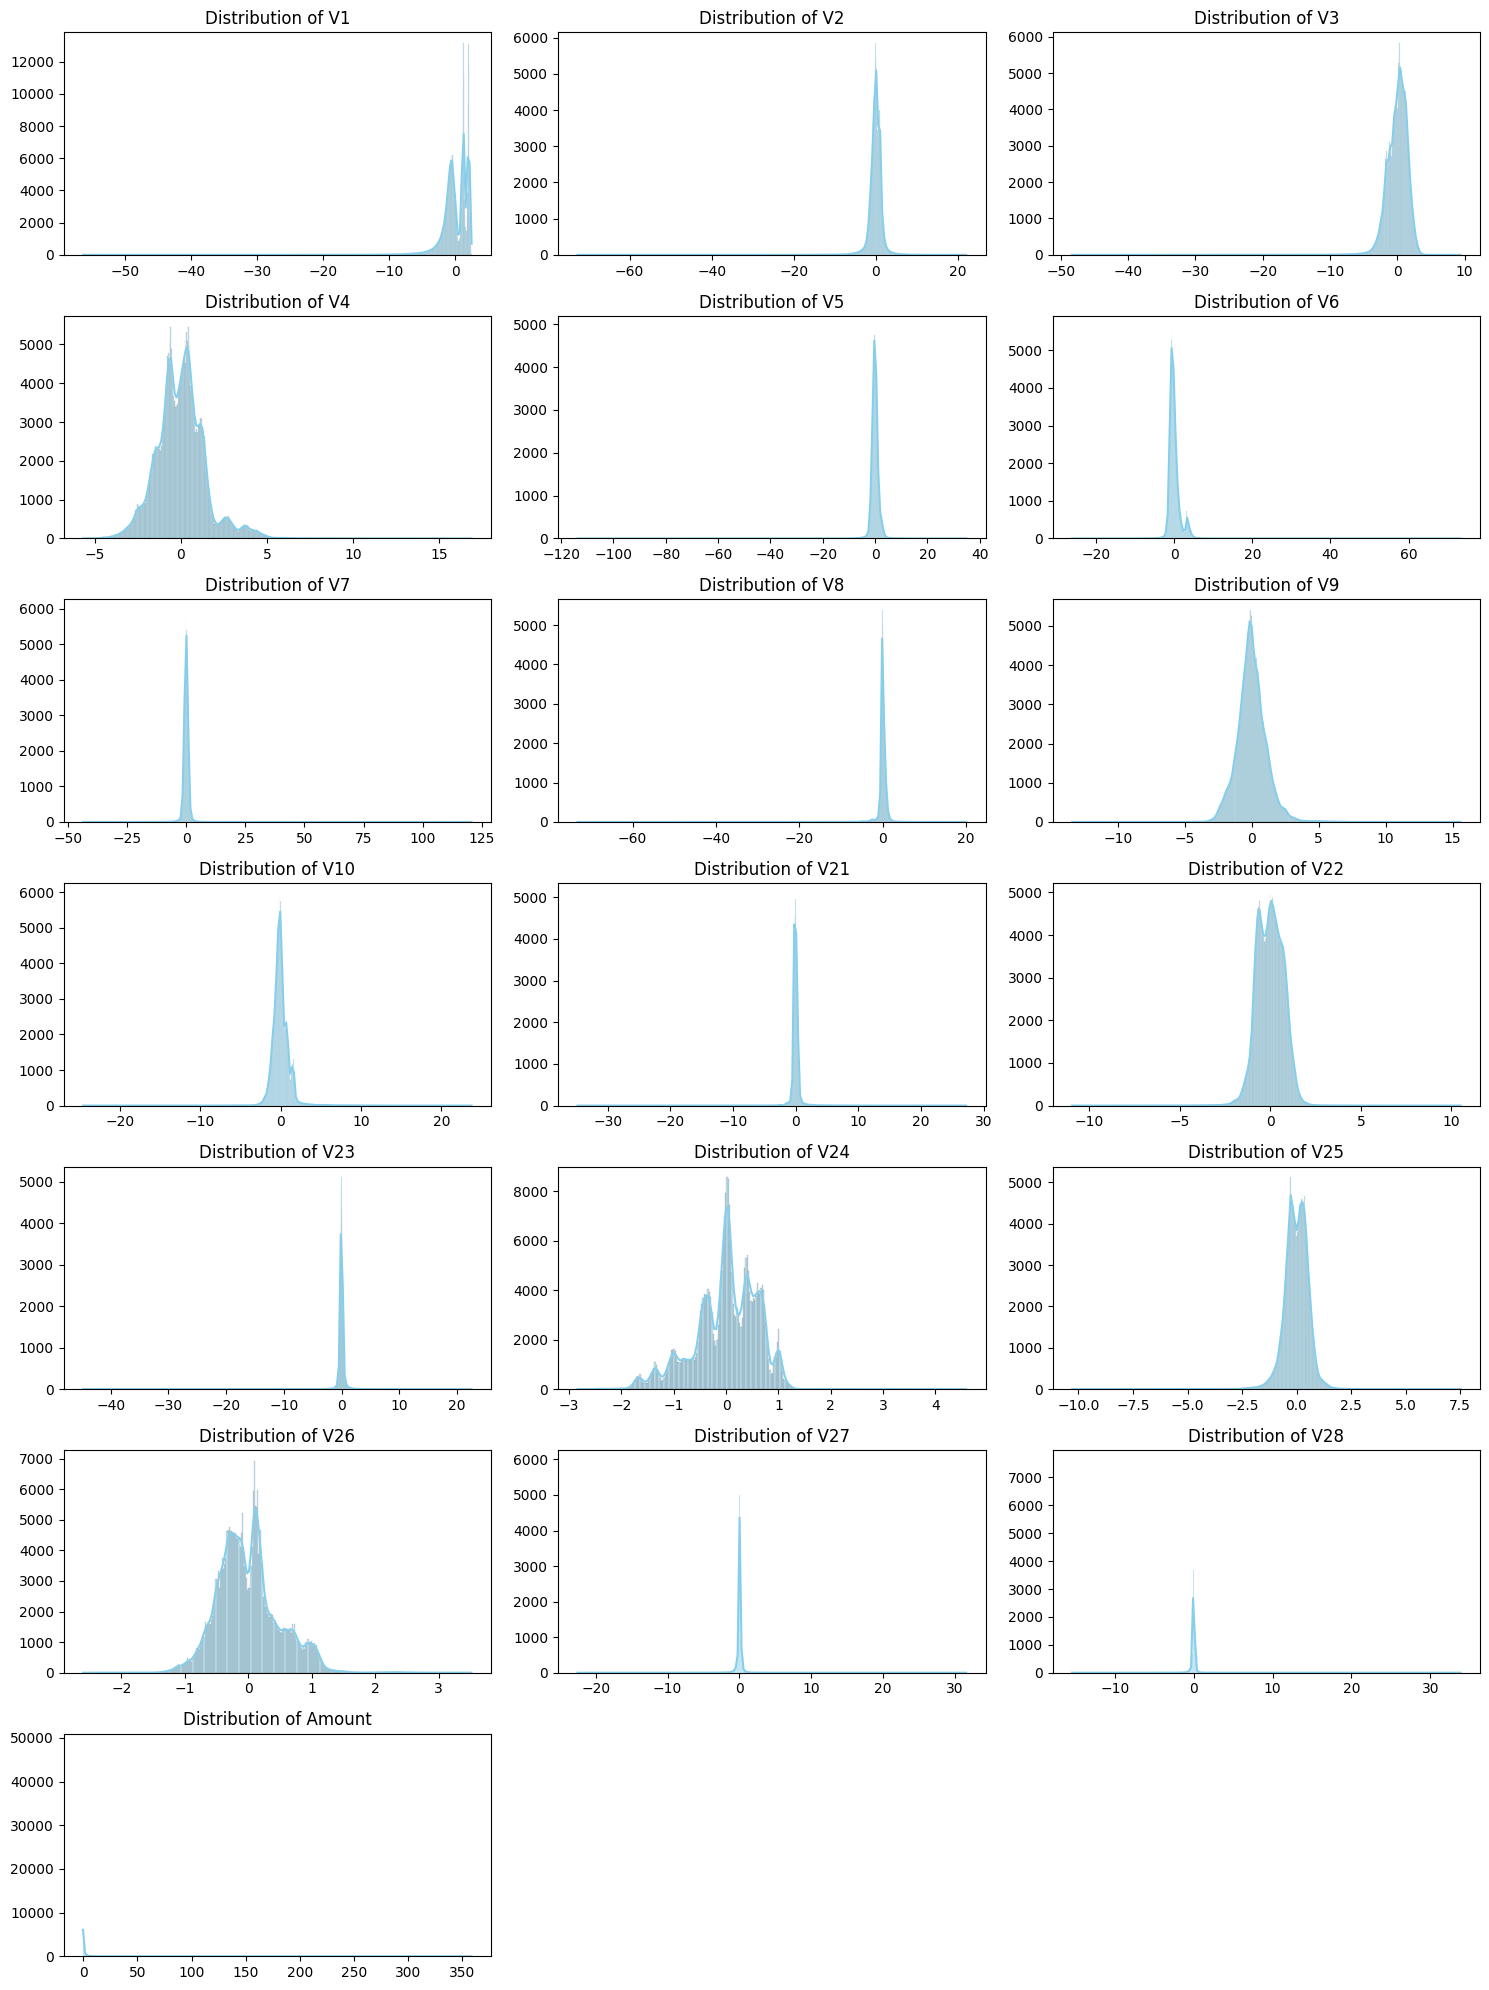

In [ ]:
# Выбор числовых признаков
numeric_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
                    'V10', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
                    'V28', 'Amount']

# Визуализация гистограмм
def plot_histograms(data, columns):
    fig, axes = plt.subplots(nrows=len(columns) // 3 + 1, ncols=3, figsize=(15, 20))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        sns.histplot(data[column], kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f"Distribution of {column}")
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")

    # Удаление пустых графиков
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Построение гистограмм
plot_histograms(data, numeric_features)

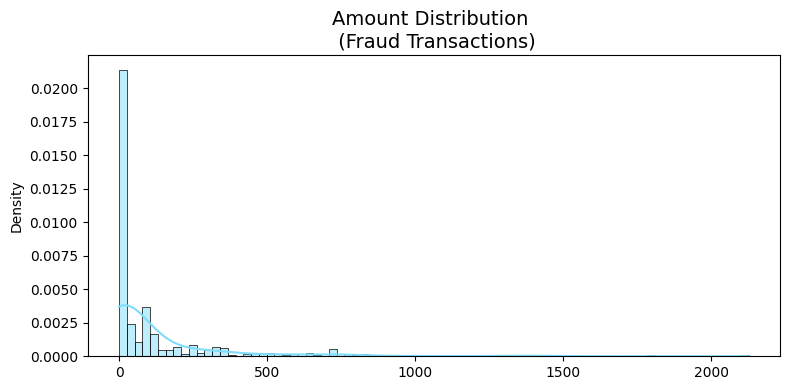

In [ ]:
# Создание подграфиков
f, ax = plt.subplots(1, 1, figsize=(8, 4))

# Данные для мошеннических транзакций
am_fraud_dist = data['Amount'].loc[data['Class'] == 1].values

sns.histplot(am_fraud_dist, ax=ax, kde=True, color='#7fddfa', stat='density')
ax.set_title('Amount Distribution \n (Fraud Transactions)', fontsize=14)

# Отображение графиков
plt.tight_layout()
plt.show()

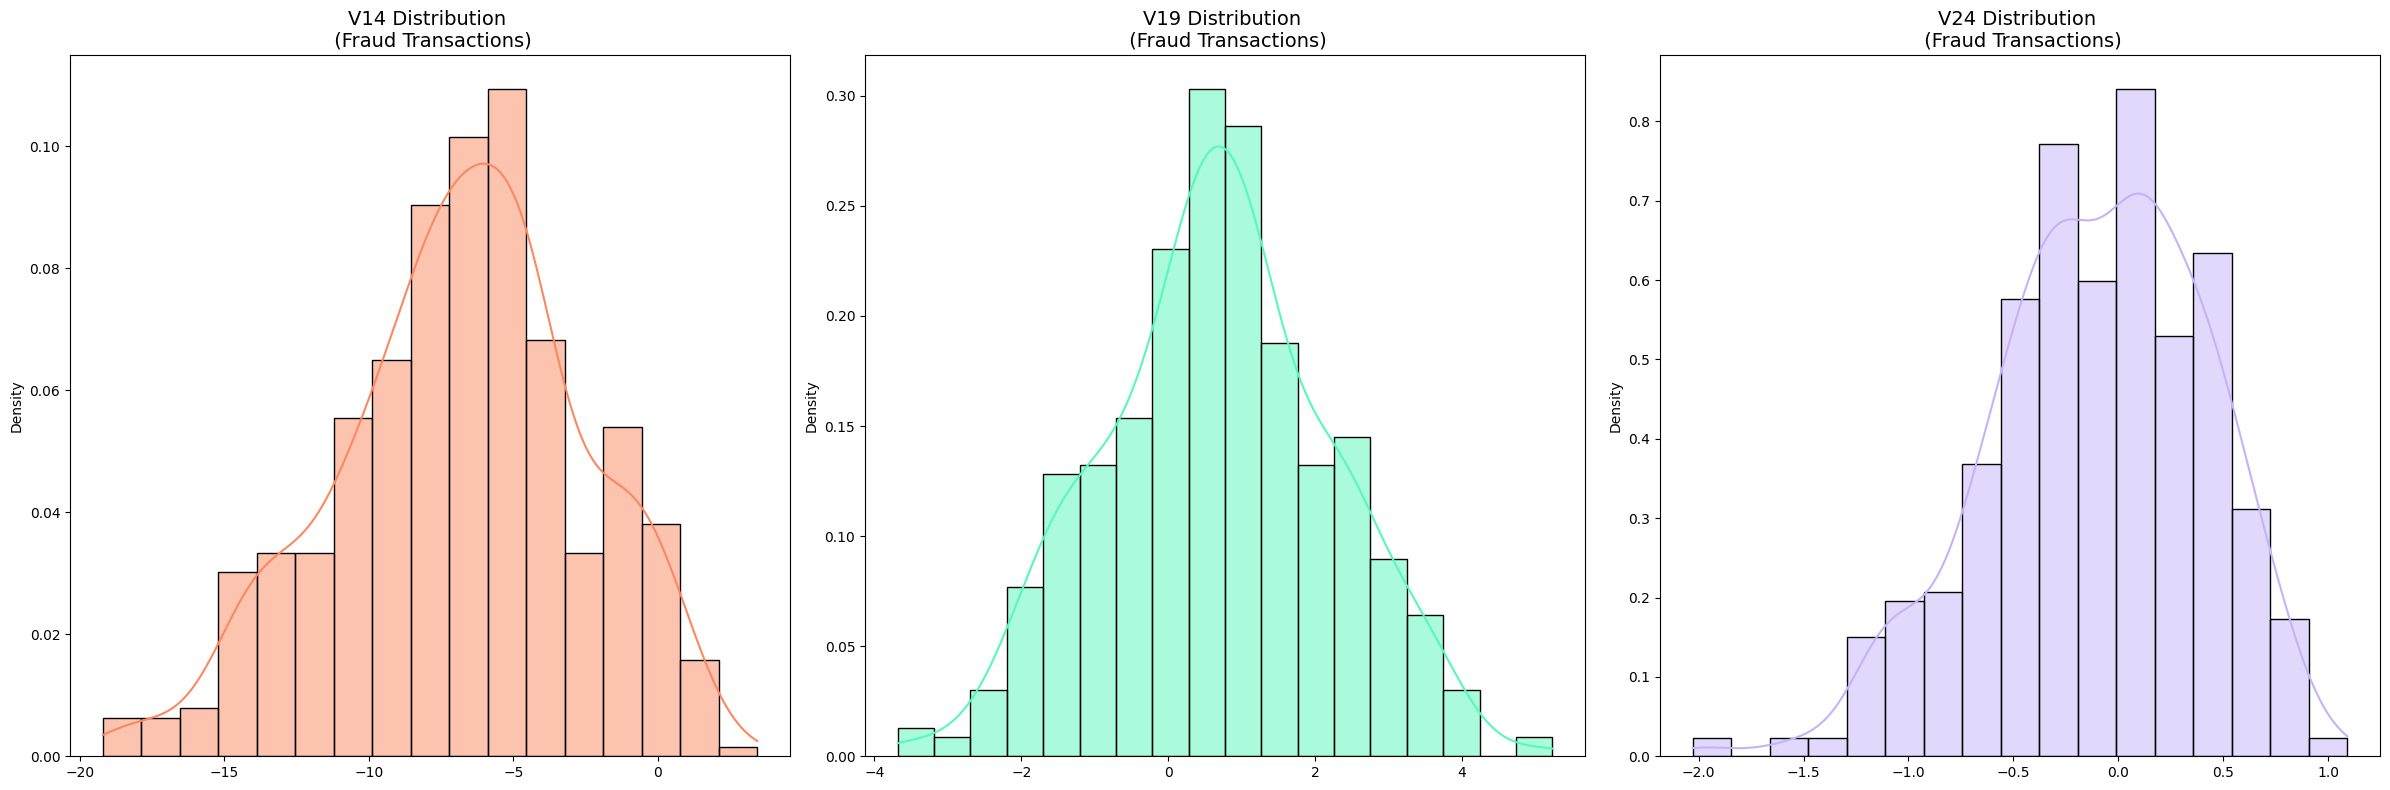

In [ ]:
# Создание подграфиков
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

# Данные для мошеннических транзакций
v14_fraud_dist = data['V14'].loc[data['Class'] == 1].values
v19_fraud_dist = data['V19'].loc[data['Class'] == 1].values
v24_fraud_dist = data['V24'].loc[data['Class'] == 1].values

# График для V14
sns.histplot(v14_fraud_dist, ax=ax1, kde=True, color='#FB8861', stat='density')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

# График для V19
sns.histplot(v19_fraud_dist, ax=ax2, kde=True, color='#56F9BB', stat='density')
ax2.set_title('V19 Distribution \n (Fraud Transactions)', fontsize=14)

# График для V24
sns.histplot(v24_fraud_dist, ax=ax3, kde=True, color='#C5B3F9', stat='density')
ax3.set_title('V24 Distribution \n (Fraud Transactions)', fontsize=14)

# # График для V17
# sns.histplot(v17_fraud_dist, ax=ax4, kde=True, color='#ffc0cb', stat='density')
# ax4.set_title('V17 Distribution \n (Fraud Transactions)', fontsize=14)

# Отображение графиков
plt.tight_layout()
plt.show()

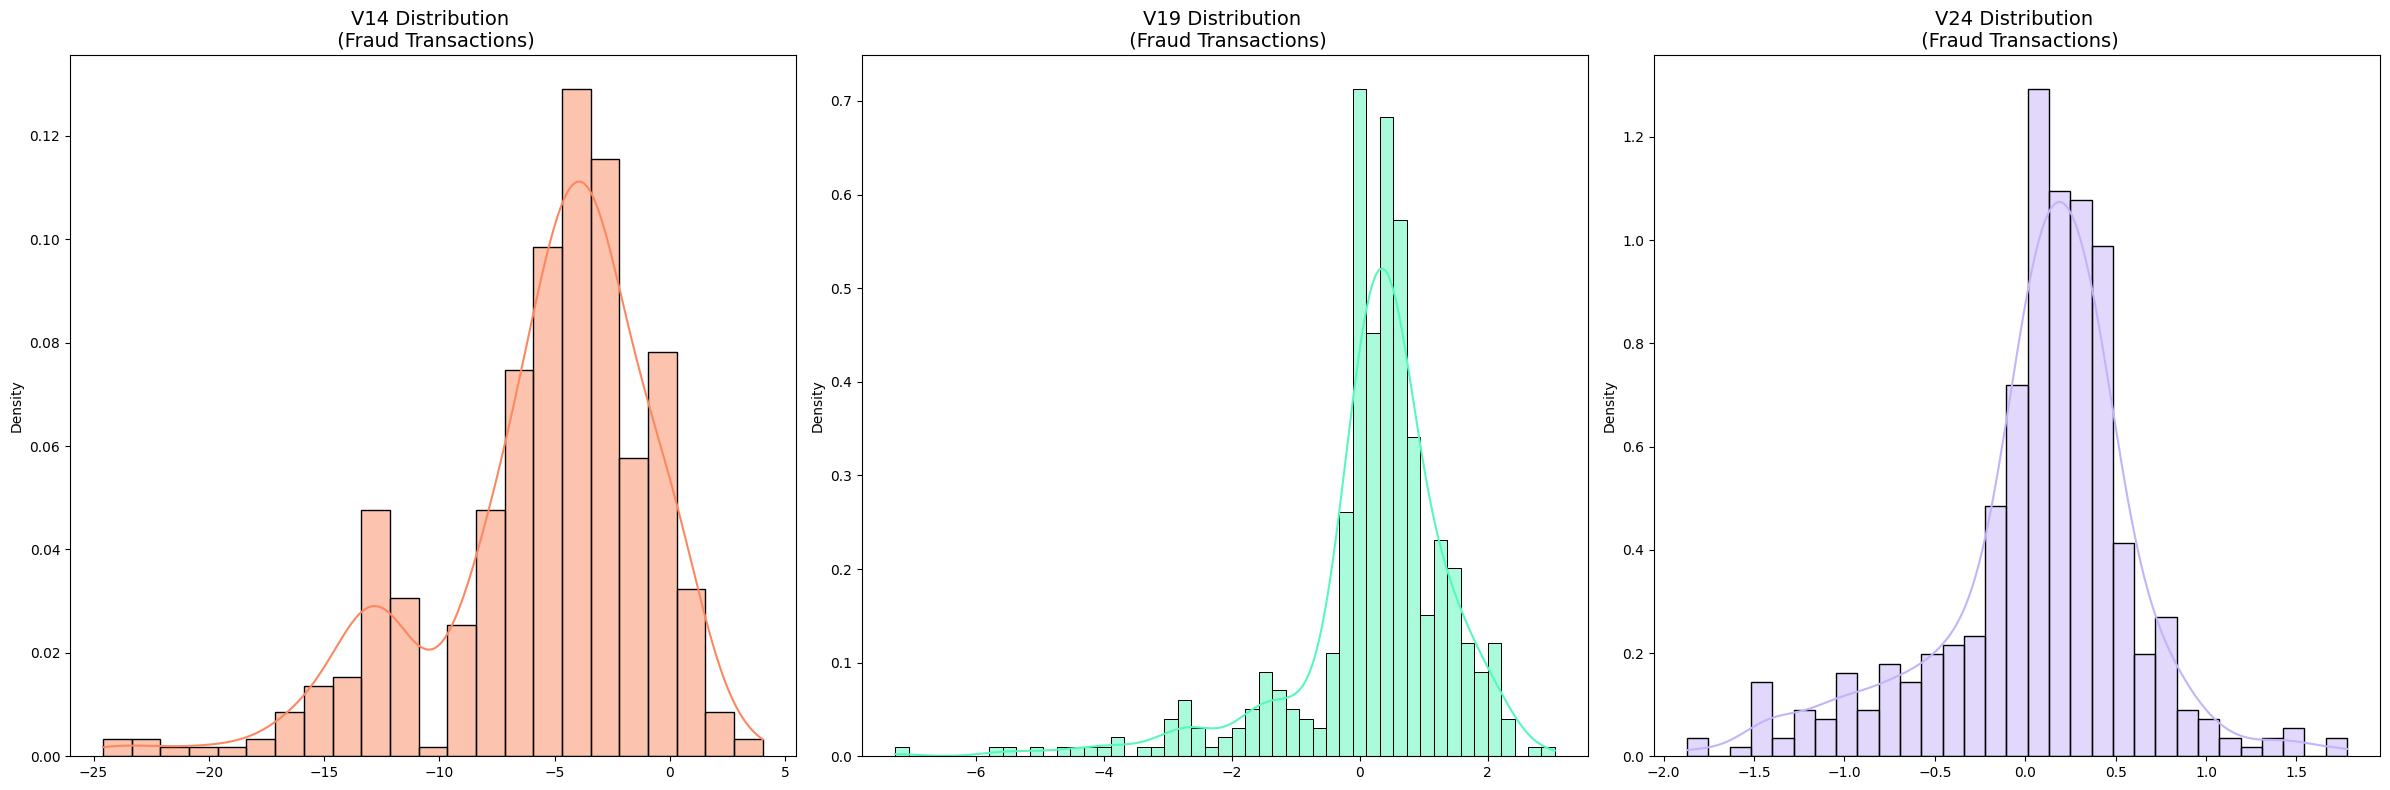

In [ ]:
# Создание подграфиков
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

# Данные для мошеннических транзакций
v14_fraud_dist = data['V10'].loc[data['Class'] == 1].values
v19_fraud_dist = data['V27'].loc[data['Class'] == 1].values
v24_fraud_dist = data['V28'].loc[data['Class'] == 1].values

# График для V14
sns.histplot(v14_fraud_dist, ax=ax1, kde=True, color='#FB8861', stat='density')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

# График для V19
sns.histplot(v19_fraud_dist, ax=ax2, kde=True, color='#56F9BB', stat='density')
ax2.set_title('V19 Distribution \n (Fraud Transactions)', fontsize=14)

# График для V24
sns.histplot(v24_fraud_dist, ax=ax3, kde=True, color='#C5B3F9', stat='density')
ax3.set_title('V24 Distribution \n (Fraud Transactions)', fontsize=14)

# # График для V17
# sns.histplot(v17_fraud_dist, ax=ax4, kde=True, color='#ffc0cb', stat='density')
# ax4.set_title('V17 Distribution \n (Fraud Transactions)', fontsize=14)

# Отображение графиков
plt.tight_layout()
plt.show()

### Обнаружение дубликатов

In [ ]:
data.duplicated().sum()

np.int64(1081)

In [ ]:
data[data['Class']==1].duplicated().sum()

np.int64(19)

### Распределение целевого признака (дисбаланс классов)

In [ ]:
# print(pd.Series(data["Class"]).value_counts(normalize=True))
class_distribution = pd.Series(data["Class"]).value_counts(normalize=True) * 100
class_distribution = class_distribution.apply(lambda x: f"{x:.2f}%")

print(class_distribution)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


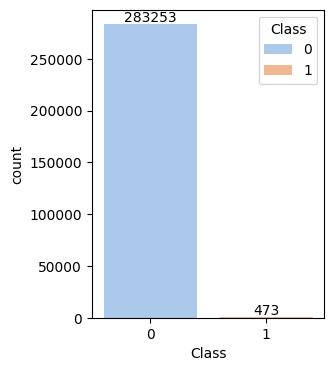

In [ ]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=data,palette="pastel", hue='Class')
for i in ax.containers:
    ax.bar_label(i,)

В данной задаче наблюдается значительный дисбаланс классов. Доля миноритарного класса (например, мошеннические транзакции) составляет всего **0.172%**. Такая несбалансированность создает сложности при обучении моделей машинного обучения:

- Модели могут быть склонны к предсказанию мажоритарного класса, игнорируя миноритарный.
- Обычные метрики, такие как **Accuracy**, становятся ненадежными, так как высокая точность может быть достигнута простым предсказанием мажоритарного класса.

Чтобы справиться с этой проблемой, я буду использовать специализированные методы балансировки данных (Random Undersampling, SMOTE, Random Oversampling) и выберу метрики, которые будут адекватно отражать качество модели в условиях дисбаланса.

### Выбор метрик оценки качества модели

Для задач с дисбалансом классов стандартные метрики, такие как **Accuracy**, неинформативны. Я буду использовать следующие метрики, которые лучше подходят для оценки производительности модели:

1. **Precision:**
   - Доля правильно предсказанных положительных классов среди всех предсказанных как положительные.
   - Важна для минимизации ложных срабатываний (False Positives).

2. **Recall:**
   - Доля правильно предсказанных положительных классов среди всех реальных положительных классов.
   - Важна для минимизации пропущенных случаев (False Negatives).

3. **F1-Score:**
   - Гармоническое среднее между Precision и Recall.
   - Используется для поиска баланса между Precision и Recall.

4. **AUPRC (Area Under the Precision-Recall Curve):**
   - Площадь под кривой Precision-Recall.
   - Особенно полезна для задач с дисбалансом классов, так как фокусируется на миноритарном классе.

**AUPRC** будет использоваться как основная метрика для сравнения моделей, так как она наиболее информативна для задач с дисбалансом классов.

## Предобработка данных

### Удаление дубликатов

In [5]:
data.drop_duplicates(inplace=True)
data.shape

(283726, 31)

### Удаление признака "Time"

In [6]:
data = data.drop('Time', axis=1)

### Масштабирование числовых признаков

Попробовать масштабировать все признаки

StandardScaler
Приводит данные к стандартному нормальному распределению (среднее = 0, стандартное отклонение = 1).
Подходит для признаков с нормальным распределением (например, V1–V28).

RobustScaler
Приводит данные к медиане и межквартильному размаху (устойчив к выбросам).
Подходит для признаков с выбросами (например, Amount). V10, V27, V28, Amount!!

In [ ]:
# from sklearn.preprocessing import StandardScaler

# Выбор числовых признаков
numeric_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
                    'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
                    'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
                    'V26', 'V27', 'V28']

# Масштабирование
# scaler = StandardScaler()
# scaler = RobustScaler()
# data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [7]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)

# RobustScaler is less prone to outliers.

# std_scaler = StandardScaler()
rob_scaler = RobustScaler()

# data['Amount'] = std_scaler.fit_transform(data['Amount'].values.reshape(-1,1))

data['Amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
# data['Time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

# data[['Time', 'Amount']].describe()
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,0.924387,0.001667
std,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,3.482123,0.040796
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-0.305938,0.000000
25%,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,-0.228063,0.000000
50%,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,0.000000,0.000000
75%,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,0.771937,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,356.962314,1.000000


### Разделение данных на выборки

In [8]:
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Dummy model
Модель, которая всегда будет предсказывать класс "мошенничество". Она будет служить отправной точкой для сравнения с более сложными моделями.

In [9]:
y_pred_dummy = [1] * len(y_test)  # Предсказания только "мошенничество"

# Оценка качества
precision, recall, _ = precision_recall_curve(y_test, y_pred_dummy)

auprc_dummy = auc(recall, precision)
f1_dummy = f1_score(y_test, y_pred_dummy)
recall_dummy = recall_score(y_test, y_pred_dummy)
prec_dummy = precision_score(y_test, y_pred_dummy)

In [10]:
ndf = [(recall_dummy, prec_dummy, f1_dummy, auprc_dummy)]

dummy_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'AUPRC'])
dummy_score.insert(0, 'Model', 'Dummy model')
dummy_score.round(3)

,Model,Recall,Precision,F1 Score,AUPRC
0,Dummy model,1.0,0.001674,0.003343,0.500837


## Обучение моделей на исходных данных

### Logistic Regression

#### Обучение модели

In [11]:
imbalanced_log = LogisticRegression(max_iter=1000, random_state=42)

imbalanced_log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Оценка модели

In [12]:
y_probs = imbalanced_log.predict_proba(X_test)[:, 1]
precision1, recall1, _ = precision_recall_curve(y_test, y_probs)
auprc_imbalanced_log = auc(recall1, precision1)

In [13]:
test_pred = imbalanced_log.predict(X_test)
f1_imbalanced_log = f1_score(y_test, test_pred)
prec_imbalanced_log = precision_score(y_test, test_pred)
recall_imbalanced_log = recall_score(y_test, test_pred)

In [62]:
ndf = [(recall_imbalanced_log, prec_imbalanced_log, f1_imbalanced_log, auprc_imbalanced_log)]

imbalanced_log_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'AUPRC'])
imbalanced_log_score.insert(0, 'Model', 'Imbalanced Data Logistic Regression')
imbalanced_log_score.round(3)

,Model,Recall,Precision,F1 Score,AUPRC
0,Imbalanced Data Logistic Regression,0.579,0.846,0.688,0.69


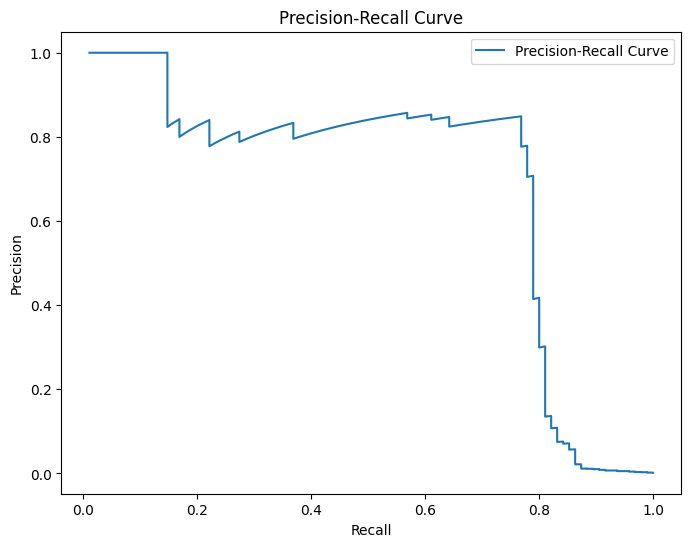

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(recall1[:-1], precision1[:-1], label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

### Random Forest

#### Обучение модели

In [17]:
imb_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

imb_rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

#### Оценка модели

In [18]:
test_pred = imb_rf_model.predict(X_test)
f1_imbalanced_f = f1_score(y_test, test_pred)
prec_imbalanced_f = precision_score(y_test, test_pred)
recall_imbalanced_f = recall_score(y_test, test_pred)

In [19]:
y_pred_proba = imb_rf_model.predict_proba(X_test)[:, 1]
precision2, recall2, _ = precision_recall_curve(y_test, y_pred_proba)
auprc_imbalanced_f = auc(recall2, precision2)

In [63]:
ndf = [(recall_imbalanced_f, prec_imbalanced_f, f1_imbalanced_f, auprc_imbalanced_f)]

imbalanced_f_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'AUPRC'])
imbalanced_f_score.insert(0, 'Model', 'Imbalanced Data Random Forest')
imbalanced_f_score.round(3)

,Model,Recall,Precision,F1 Score,AUPRC
0,Imbalanced Data Random Forest,0.705,0.985,0.822,0.818


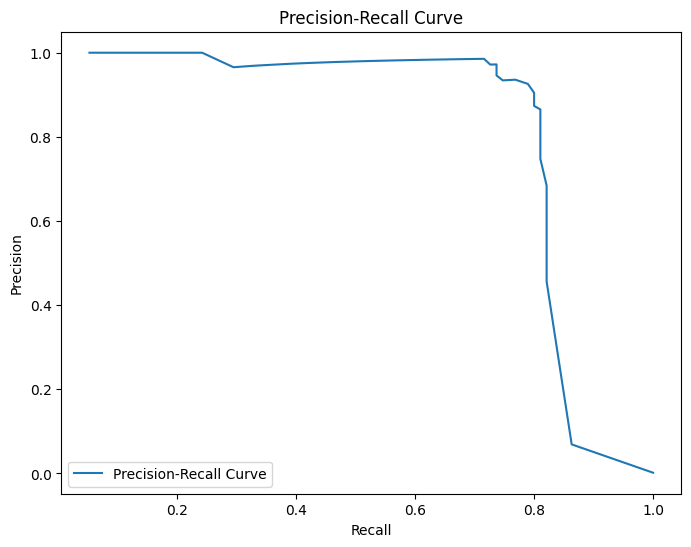

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(recall2[:-1], precision2[:-1], label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

## Обучение моделей на сбалансированных данных

### Random Oversampling


#### Балансировка данных

In [22]:
ros = RandomOverSampler(random_state=42)

X_over, y_over = ros.fit_resample(X_train, y_train)

In [ ]:
print('Genuine:', y_over.value_counts()[0], '/', round(y_over.value_counts()[0]/len(y_over) * 100,2), '% of the dataset')
print('Frauds:', y_over.value_counts()[1], '/',round(y_over.value_counts()[1]/len(y_over) * 100,2), '% of the dataset')

Genuine: 226602 / 50.0 % of the dataset
Frauds: 226602 / 50.0 % of the dataset


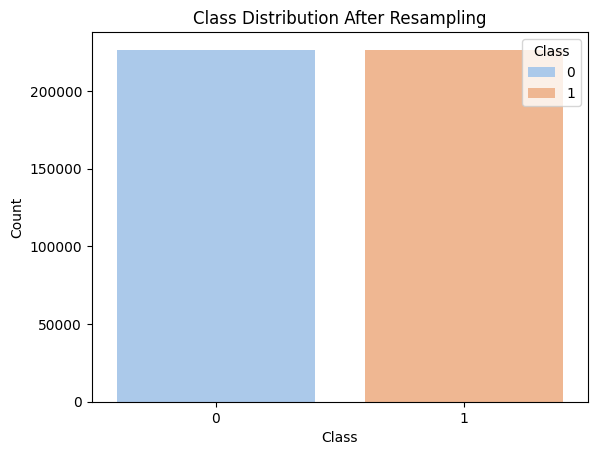

In [ ]:
sns.countplot(x=y_over, palette='pastel', hue=y_over)
plt.title("Class Distribution After Resampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

#### Logistic Regression

##### Обучение модели

In [23]:
randover_log = LogisticRegression(max_iter=1000, random_state=42)

randover_log.fit(X_over, y_over)

LogisticRegression(max_iter=1000)

##### Оценка модели

In [24]:
y_probs = randover_log.predict_proba(X_test)[:, 1]
precision3, recall3, _ = precision_recall_curve(y_test, y_probs)
auprc_randover_log = auc(recall3, precision3)

In [25]:
test_pred = randover_log.predict(X_test)
f1_randover_log = f1_score(y_test, test_pred)
prec_randover_log = precision_score(y_test, test_pred)
recall_randover_log = recall_score(y_test, test_pred)

In [64]:
ndf = [(recall_randover_log, prec_randover_log, f1_randover_log, auprc_randover_log)]

randover_log_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'AUPRC'])
randover_log_score.insert(0, 'Model', 'Random Oversampling Logistic Regression')
randover_log_score.round(3)

,Model,Recall,Precision,F1 Score,AUPRC
0,Random Oversampling Logistic Regression,0.874,0.056,0.106,0.705


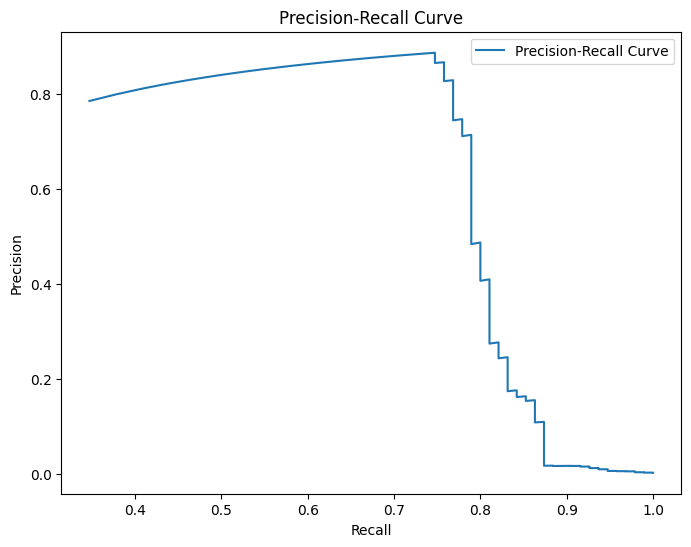

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(recall3[:-1], precision3[:-1], label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

#### Random Forest

##### Обучение модели

In [28]:
randov_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

randov_rf_model.fit(X_over, y_over)

RandomForestClassifier(class_weight='balanced', random_state=42)

##### Оценка модели

In [29]:
y_probs = randov_rf_model.predict_proba(X_test)[:, 1]
precision4, recall4, _ = precision_recall_curve(y_test, y_probs)
auprc_randover_f = auc(recall4, precision4)

In [30]:
test_pred = randov_rf_model.predict(X_test)
f1_randover_f= f1_score(y_test, test_pred)
prec_randover_f = precision_score(y_test, test_pred)
recall_randover_f = recall_score(y_test, test_pred)

In [65]:
ndf = [(recall_randover_f, prec_randover_f, f1_randover_f, auprc_randover_f)]

randover_f_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'AUPRC'])
randover_f_score.insert(0, 'Model', 'Random Oversampling Random Forest')
randover_f_score.round(3)

,Model,Recall,Precision,F1 Score,AUPRC
0,Random Oversampling Random Forest,0.726,0.972,0.831,0.822


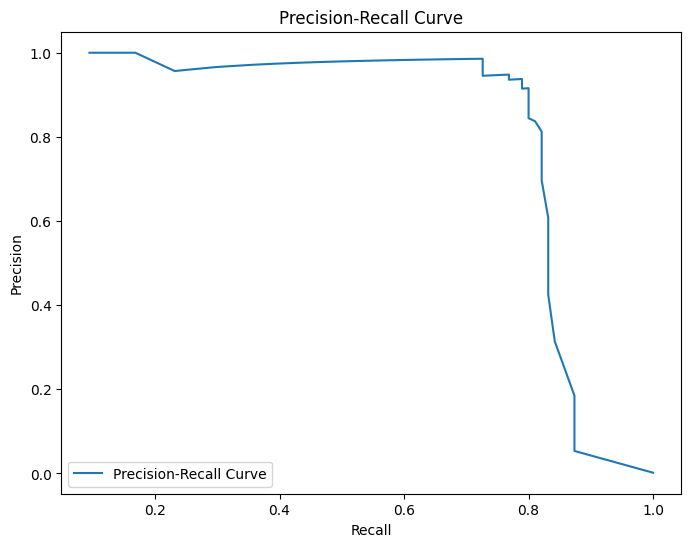

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(recall4[:-1], precision4[:-1], label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

### SMOTE
(Synthetic Minority Oversampling Technique).

#### Балансировка данных

In [33]:
smt= SMOTE(random_state=42)
X_smote, y_smote = smt.fit_resample(X_train, y_train)


In [ ]:
print('Genuine:', y_smote.value_counts()[0], '/', round(y_smote.value_counts()[0]/len(y_smote) * 100,2), '% of the dataset')
print('Frauds:', y_smote.value_counts()[1], '/',round(y_smote.value_counts()[1]/len(y_smote) * 100,2), '% of the dataset')

Genuine: 226602 / 50.0 % of the dataset
Frauds: 226602 / 50.0 % of the dataset


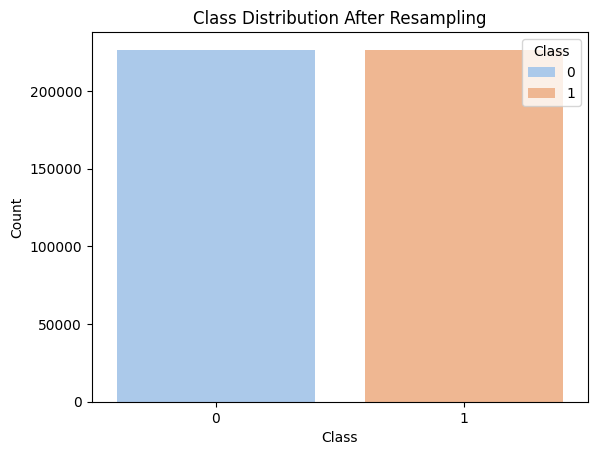

In [ ]:
sns.countplot(x=y_smote, palette='pastel', hue=y_smote)
plt.title("Class Distribution After Resampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

#### Logistic Regression

##### Обучение модели

In [34]:
smote_log = LogisticRegression(random_state=42, max_iter=1000)
smote_log.fit(X_smote, y_smote)

LogisticRegression(max_iter=1000, random_state=42)

##### Оценка модели

In [35]:
y_probs = smote_log.predict_proba(X_test)[:, 1]
precision5, recall5, _ = precision_recall_curve(y_test, y_probs)
auprc_smote_log = auc(recall5, precision5)

In [36]:
test_pred = smote_log.predict(X_test)
f1_smote_log = f1_score(y_test, test_pred)
prec_smote_log = precision_score(y_test, test_pred)
recall_smote_log = recall_score(y_test, test_pred)

In [66]:
ndf = [(recall_smote_log, prec_smote_log, f1_smote_log, auprc_smote_log)]

smote_log_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'AUPRC'])
smote_log_score.insert(0, 'Model', 'SMOTE Logistic Regression')
smote_log_score.round(3)

,Model,Recall,Precision,F1 Score,AUPRC
0,SMOTE Logistic Regression,0.874,0.054,0.101,0.711


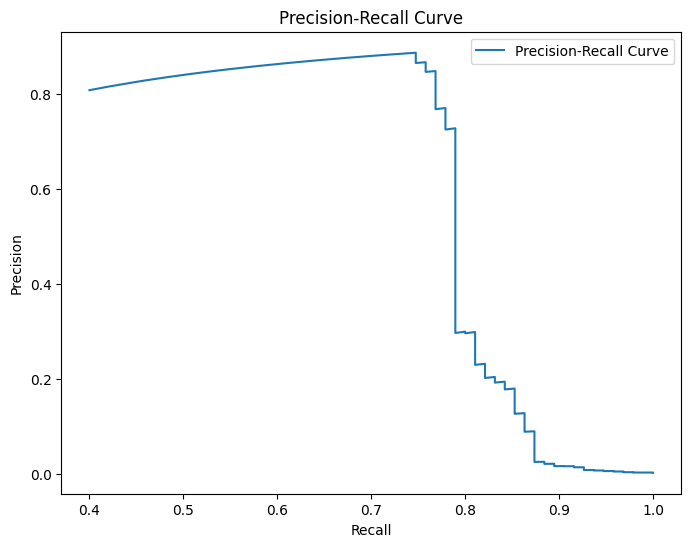

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(recall5[:-1], precision5[:-1], label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

#### Random Forest

##### Обучение модели

In [39]:
smote_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

smote_rf_model.fit(X_smote, y_smote)

RandomForestClassifier(class_weight='balanced', random_state=42)

##### Оценка модели

In [40]:
y_probs = smote_rf_model.predict_proba(X_test)[:, 1]
precision6, recall6, _ = precision_recall_curve(y_test, y_probs)
auprc_smote_f = auc(recall6, precision6)

In [41]:
test_pred = smote_rf_model.predict(X_test)
f1_smote_f = f1_score(y_test, test_pred)
prec_smote_f = precision_score(y_test, test_pred)
recall_smote_f = recall_score(y_test, test_pred)

In [67]:
ndf = [(recall_smote_f, prec_smote_f, f1_smote_f, auprc_smote_f)]

smote_f_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'AUPRC'])
smote_f_score.insert(0, 'Model', 'SMOTE Random Forest')
smote_f_score.round(3)

,Model,Recall,Precision,F1 Score,AUPRC
0,SMOTE Random Forest,0.768,0.912,0.834,0.811


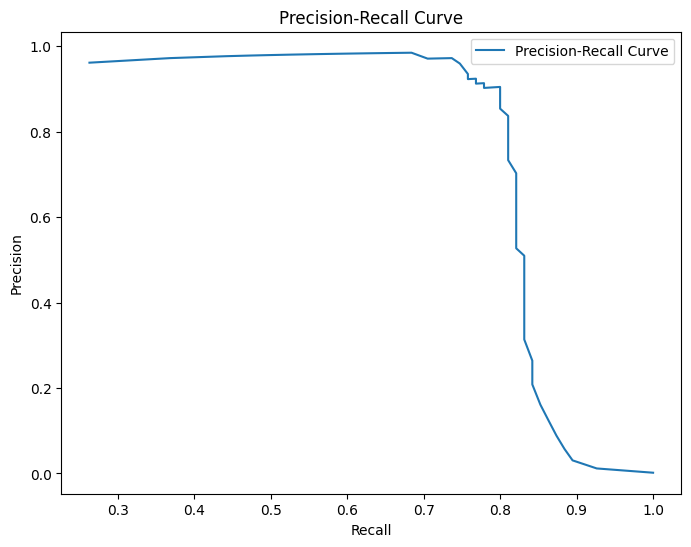

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(recall6[:-1], precision6[:-1], label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

### Random Undersampling


#### Балансировка данных

In [44]:
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_train, y_train)

In [ ]:
print('Genuine:', y_under.value_counts()[0], '/', round(y_under.value_counts()[0]/len(y_under) * 100,2), '% of the dataset')
print('Frauds:', y_under.value_counts()[1], '/',round(y_under.value_counts()[1]/len(y_under) * 100,2), '% of the dataset')

Genuine: 378 / 50.0 % of the dataset
Frauds: 378 / 50.0 % of the dataset


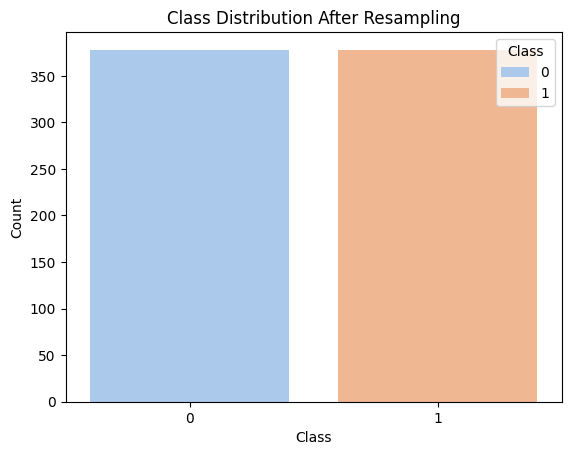

In [ ]:
sns.countplot(x=y_under, palette='pastel', hue=y_under)
plt.title("Class Distribution After Resampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

#### Logistic Regression

##### Обучение модели

In [45]:
randunder_log = LogisticRegression(max_iter=1000, random_state=42)
randunder_log.fit(X_under, y_under)

LogisticRegression(max_iter=1000)

##### Оценка модели

In [46]:
y_probs = randunder_log.predict_proba(X_test)[:, 1]
precision7, recall7, _ = precision_recall_curve(y_test, y_probs)
auprc_randunder_log = auc(recall7, precision7)

In [47]:
test_pred = randunder_log.predict(X_test)
f1_randunder_log = f1_score(y_test, test_pred)
prec_randunder_log = precision_score(y_test, test_pred)
recall_randunder_log = recall_score(y_test, test_pred)

In [68]:
ndf = [(recall_randunder_log, prec_randunder_log, f1_randunder_log, auprc_randunder_log)]

randunder_log_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'AUPRC'])
randunder_log_score.insert(0, 'Model', 'Random Undersampling Logistic Regression')
randunder_log_score.round(3)

,Model,Recall,Precision,F1 Score,AUPRC
0,Random Undersampling Logistic Regression,0.874,0.05,0.095,0.622


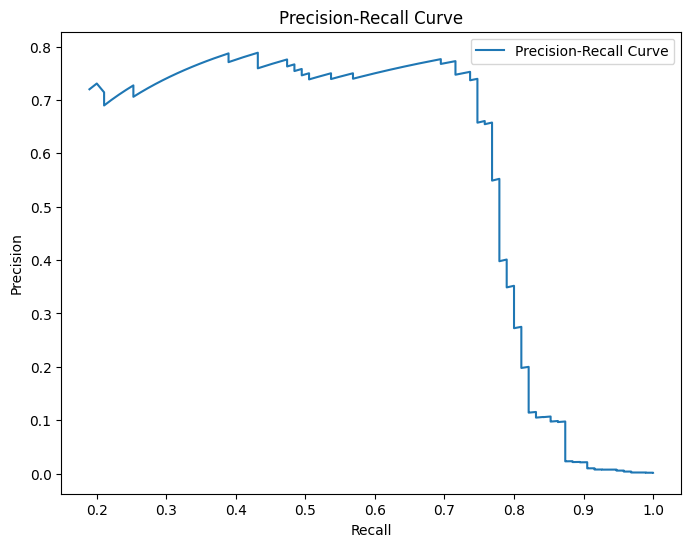

In [49]:
plt.figure(figsize=(8, 6))
plt.plot(recall7[:-1], precision7[:-1], label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

#### Random Forest

##### Обучение модели

In [50]:
randunder_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

randunder_rf.fit(X_under, y_under)

RandomForestClassifier(class_weight='balanced', random_state=42)

##### Оценка модели

In [51]:
y_probs = randunder_rf.predict_proba(X_test)[:, 1]
precision8, recall8, _ = precision_recall_curve(y_test, y_probs)
auprc_randunder_f = auc(recall8, precision8)

In [52]:
test_pred = randunder_rf.predict(X_test)
f1_randunder_f = f1_score(y_test, test_pred)
prec_randunder_f = precision_score(y_test, test_pred)
recall_randunder_f = recall_score(y_test, test_pred)

In [69]:
ndf = [(recall_randunder_f, prec_randunder_f, f1_randunder_f, auprc_randunder_f)]

randunder_f_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'AUPRC'])
randunder_f_score.insert(0, 'Model', 'Random Undersampling Random Forest')
randunder_f_score.round(3)

,Model,Recall,Precision,F1 Score,AUPRC
0,Random Undersampling Random Forest,0.863,0.079,0.145,0.739


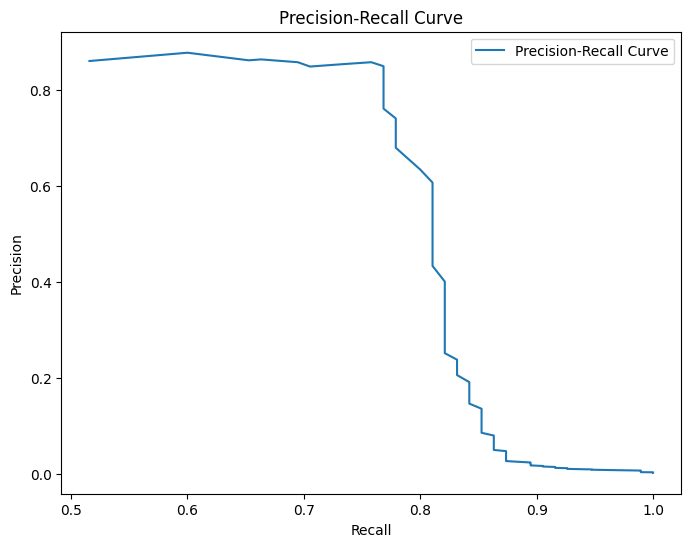

In [54]:
plt.figure(figsize=(8, 6))
plt.plot(recall8[:-1], precision8[:-1], label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

## Сравнение моделей

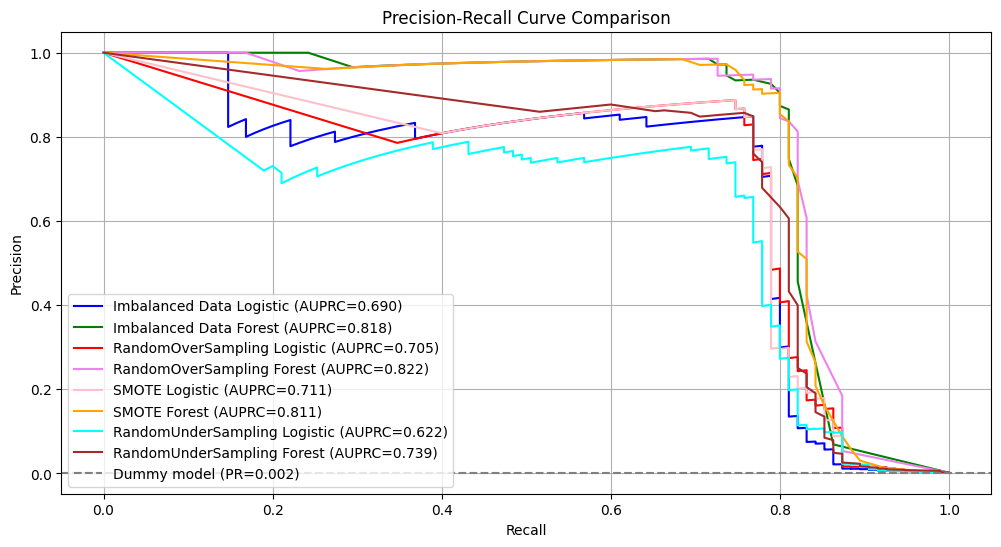

In [55]:
plt.figure(figsize=(12, 6))

plt.plot(recall1, precision1, label=f'Imbalanced Data Logistic (AUPRC={auprc_imbalanced_log:.3f})', color='blue')
plt.plot(recall2, precision2, label=f'Imbalanced Data Forest (AUPRC={auprc_imbalanced_f:.3f})', color='green')

plt.plot(recall3, precision3, label=f'RandomOverSampling Logistic (AUPRC={auprc_randover_log:.3f})', color='red')
plt.plot(recall4, precision4, label=f'RandomOverSampling Forest (AUPRC={auprc_randover_f:.3f})', color='violet')

plt.plot(recall5, precision5, label=f'SMOTE Logistic (AUPRC={auprc_smote_log:.3f})', color='pink')
plt.plot(recall6, precision6, label=f'SMOTE Forest (AUPRC={auprc_smote_f:.3f})', color='orange')

plt.plot(recall7, precision7, label=f'RandomUnderSampling Logistic (AUPRC={auprc_randunder_log:.3f})', color='cyan')
plt.plot(recall8, precision8, label=f'RandomUnderSampling Forest (AUPRC={auprc_randunder_f:.3f})', color='brown')


# Базовый уровень
baseline = y_test.mean()
plt.axhline(baseline, linestyle='--', color='gray', label=f'Dummy model (PR={baseline:.3f})')

# Настройка графика
plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
scores = [
    dummy_score, imbalanced_log_score, imbalanced_f_score,
    randover_log_score, randover_f_score, smote_log_score,
    smote_f_score, randunder_log_score, randunder_f_score
]

results = pd.concat(scores, ignore_index=True, sort=False)
results = results.sort_values(by=['AUPRC'], ascending=True).reset_index(drop=True).round(3)
results

,Model,Recall,Precision,F1 Score,AUPRC
0,Dummy model,1.000,0.002,0.003,0.501
1,Random Undersampling Logistic Regression,0.874,0.050,0.095,0.622
2,Imbalanced Data Logistic Regression,0.579,0.846,0.688,0.690
3,Random Oversampling Logistic Regression,0.874,0.056,0.106,0.705
4,SMOTE Logistic Regression,0.874,0.054,0.101,0.711
5,Random Undersampling Random Forest,0.863,0.079,0.145,0.739
6,SMOTE Random Forest,0.768,0.912,0.834,0.811
7,Imbalanced Data Random Forest,0.705,0.985,0.822,0.818
8,Random Oversampling Random Forest,0.726,0.972,0.831,0.822


## Вывод

## Сохранение модели/моделей